# Question-1

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**Solution:** The result of a matrix multiplictaion between a (n,k) and (k,m) is a matrix of dimension (n,m). Therefore, the total number of elements in the resultant matrix is n*m. Also, to obtain each element of the resultant matrix, we need to perform k multiplications and (k-1) additions. Hence, total number of multplications and additions required to perform is (n * m * k) and (k-1) * n * m respectively.

# Question-2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np
import time

In [2]:
def matrixMultiply(arr1, arr2):
  n = len(arr1)
  k = len(arr2)
  m = len(arr2[0])
  result = []
  for i in range(n):
    row = []
    for j in range(m):
      ele = 0
      for x in range(k):
        ele = ele + arr1[i][x] * arr2[x][j]
      row.append(ele)
    result.append(row)
  return result


In [5]:
a = np.random.randint(10, size = (15,20))
b = np.random.randint(10, size = (20,30))

start_time = time.time()
matrixMultiply(a,b)
end_time = time.time()
print("Running time using list of lists = ", end_time-start_time)

Running time using list of lists =  0.00986623764038086


In [6]:
start_time = time.time()
np.matmul(a,b)
end_time = time.time()
print("Running time using numpy = ", end_time-start_time)

Running time using numpy =  0.00018334388732910156


We can see that time taken in case of numpy is very less as compared to that of the code using for loops. It is because numpy uses vectorisation for calculations related to matricies and hence parallel computing makes the calculations faster. On the other hand, in case of for loops, it is sequential calculations and hence take more time.

Using this method, the complexity to find the median of the array will be O(n²).

A better method to find the median of the array will be:
Firstly sort the array and then find the element at middle most index. If there are two middle most indices then take the average of the elements at those positions.

# Question-3

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [80]:
arr1 = np.random.randint(100,size = (1000))
arr2 = np.copy(arr1)
arr3 = np.copy(arr1)

#print(arr1)
length = len(arr1)

start_time = time.time()


for j in range(length//2):
  curr_max = 0
  ind = -1
  for i in range(length):
    if arr1[i]> curr_max:
      curr_max = arr1[i]
      ind = i
  arr1[ind] = -1
if length%2:
  curr_max = max(arr1)
else:
  curr_max = (curr_max + max(arr1))/2


print("Median of the array is: ", curr_max)
end_time = time.time()
print("Time taken :", end_time-start_time)


Median of the array is:  48.0
Time taken : 0.1087496280670166


In [81]:
start_time = time.time()
arr2.sort()
length = len(arr2)
if length%2:
  print(arr2[length//2])
else:
  num = arr2[length//2-1] + arr2[length//2]
  print(num/2)

end_time = time.time()
print("Time taken by suggested better method: ", end_time - start_time)

48.0
Time taken by suggested better method:  0.0013339519500732422


In [82]:
start_time = time.time()
print(np.median(arr3))
end_time = time.time()
print("Time taken by numpy.median():", end_time-start_time)

48.0
Time taken by numpy.median(): 0.0005059242248535156


The given method is very slow as compared to suggested method and numpy.median()

# Question-4

What is the gradient of the following function with respect to x and y?

x²y + y³sin(x)


The gradient of the given function with respect to x and y are 2xy + y³cos(x) and x² + 3y²sin(x).

# Question-5

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [90]:
import jax
import jax.numpy as jnp

def f(x,y):
    return (x*x)*y + (y**3)*jnp.sin(x)
def fx(x,y):
    return 2*x*y + jnp.cos(x) * (y**3)
def fy(x,y):
    return (x*x) + 3*(y*y)*jnp.sin(x)

grad_x = jax.grad(f, argnums=0)

print("Gradient with respect to x using JAX:")
print("Gradient at x = 2 and y = 5 is ", grad_x(2.0,5.0))
print("Gradient at x = 2 and y = 5 is ", grad_x(0.0,.0))
print("Gradient at x = -2 and y = -5 is ", grad_x(-2.0,-5.0),"\n")

print("Gradient with respect x using Analytical method:")
print("Gradient at x = 2 and y = 5 is ", fx(2.0,5.0))
print("Gradient at x = 2 and y = 5 is ", fx(0.0,.0))
print("Gradient at x = -2 and y = -5 is ", fx(-2.0,-5.0),"\n")

grad_y = jax.grad(f, argnums=1)
print("Gradient with respect to y using JAX:")
print("Gradient at x = 2 and y = 5 is ", grad_y(2.0,5.0))
print("Gradient at x = 2 and y = 5 is ", grad_y(0.0,.0))
print("Gradient at x = -2 and y = -5 is ", grad_y(-2.0,-5.0),"\n")

print("Gradient with respect y using Analytical method:")
print("Gradient at x = 2 and y = 5 is ", fy(2.0,5.0))
print("Gradient at x = 2 and y = 5 is ", fy(0.0,.0))
print("Gradient at x = -2 and y = -5 is ", fy(-2.0,-5.0),"\n")

Gradient with respect to x using JAX:
Gradient at x = 2 and y = 5 is  -32.018356
Gradient at x = 2 and y = 5 is  0.0
Gradient at x = -2 and y = -5 is  72.01836 

Gradient with respect x using Analytical method:
Gradient at x = 2 and y = 5 is  -32.018356
Gradient at x = 2 and y = 5 is  0.0
Gradient at x = -2 and y = -5 is  72.01836 

Gradient with respect to y using JAX:
Gradient at x = 2 and y = 5 is  72.1973
Gradient at x = 2 and y = 5 is  0.0
Gradient at x = -2 and y = -5 is  -64.1973 

Gradient with respect y using Analytical method:
Gradient at x = 2 and y = 5 is  72.1973
Gradient at x = 2 and y = 5 is  0.0
Gradient at x = -2 and y = -5 is  -64.1973 



# Question-6

Use sympy to confirm that you obtain the same gradient analytically.

In [93]:
import sympy as sp

x,y =sp.symbols('x y')
f= (x**2)*y + (y**3)*sp.sin(x)

print("Gradient with repect to x is :",sp.diff(f,x))
print("Gradient with respect to y is :",sp.diff(f,y))

Gradient with repect to x is : 2*x*y + y**3*cos(x)
Gradient with respect to y is : x**2 + 3*y**2*sin(x)


# Question-7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [96]:
info = {
    2022: {
        'Electrical': {
            1: {'Name': 'Abhishek', 'Marks': {'Maths': 100, 'English': 100}}
        },
        'Chemical': {
            2: {'Name': 'Ankit', 'Marks': {'Maths': 80, 'English': 75}}
        },
    },
    2023: {
        'Electrical': {
            11: {'Name': 'Yash', 'Marks': {'Maths': 90, 'English': 92}}
        },
        'CS': {
            12: {'Name': 'Aayush', 'Marks': {'Maths': 97, 'English': 95}}
        }
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

# Question-8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [112]:
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Student:
    def __init__(self, rollno, name, subs_n_marks):
        self.roll_number = rollno
        self.name = name
        self.subjects_n_marks = subs_n_marks

data = []

batch_22 = Year(2022)
branch1_22 = Branch('Electrical')
student1_22 = Student(1, 'Abhishek', {'Maths': 100, 'English': 100})
branch1_22.add_student(student1_22)
batch_22.add_branch(branch1_22)

branch2_22 = Branch('Chemical')
student2_22 = Student(2, 'Ankit', {'Maths': 91, 'English': 90})
branch2_22.add_student(student2_22)
batch_22.add_branch(branch2_22)
data.append(batch_22)

batch_23 = Year(2023)
branch1_2023 = Branch('CS')
student1_2023 = Student(16, 'Aayush', {'Maths': 90, 'English': 87})
branch1_2023.add_student(student1_2023)
batch_23.add_branch(branch1_2023)
data.append(batch_23)

for year in data:
    print(f"Year {year.year}:\n")
    for branch in year.branches:
        print(f"   Branch: {branch.name}:")
        for student in branch.students:
            print(f"      Roll Number: {student.roll_number}:")
            print(f"      Name: {student.name}")
            print("      Subjects and Marks:")
            for subject, score in student.subjects_n_marks.items():
                print(f"        {subject}: {score}")
        print()
    print()

Year 2022:

   Branch: Electrical:
      Roll Number: 1:
      Name: Abhishek
      Subjects and Marks:
        Maths: 100
        English: 100

   Branch: Chemical:
      Roll Number: 2:
      Name: Ankit
      Subjects and Marks:
        Maths: 91
        English: 90


Year 2023:

   Branch: CS:
      Roll Number: 16:
      Name: Aayush
      Subjects and Marks:
        Maths: 90
        English: 87




# Question-9

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



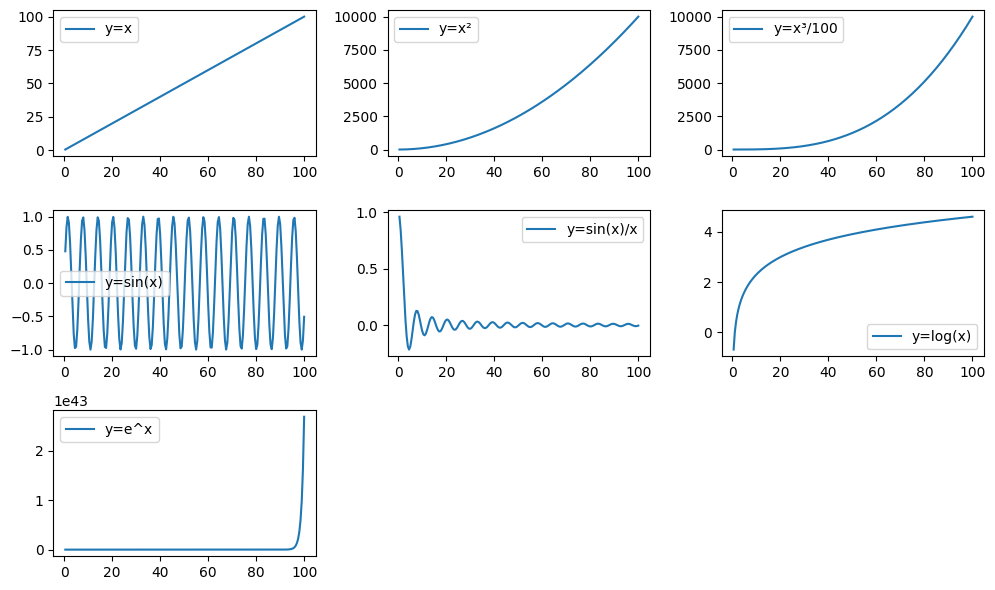

In [129]:
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

figure, axes = plt.subplots(3, 3, figsize=(10, 6))
axes[0, 0].plot(x, x, label='y=x')
axes[0, 0].legend()

axes[0, 1].plot(x, x*x, label='y=x²')
axes[0, 1].legend()

axes[0, 2].plot(x, x**3/100, label='y=x³/100')
axes[0, 2].legend()

axes[1, 0].plot(x, np.sin(x), label='y=sin(x)')
axes[1, 0].legend()

axes[1, 1].plot(x, np.sin(x)/x, label='y=sin(x)/x')
axes[1, 1].legend()

axes[1, 2].plot(x, np.log(x), label='y=log(x)')
axes[1, 2].legend()

axes[2, 0].plot(x, np.exp(x), label='y=e^x')
axes[2, 0].legend()

axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()
plt.show()


# Question-10

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [133]:
import pandas as pd

mat = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])
print("Pandas DataFrame of the Matrix:")
print(df)
print()

min_mean_row = df.mean(axis=1).idxmin()
max_stddev_col = df.std().idxmax()

print("Row having the lowest mean:", min_mean_row)
print("Column having the highest standard deviation:", max_stddev_col)


Pandas DataFrame of the Matrix:
           a         b         c         d         e
0   1.242441  1.682040  1.435405  1.599387  1.854149
1   1.342125  1.956641  1.723842  1.200854  1.882703
2   1.108604  1.412961  1.626993  1.906305  1.422352
3   1.851237  1.263341  1.420989  1.606906  1.016298
4   1.192481  1.290176  1.535721  1.782165  1.234227
5   1.106995  1.452658  1.667990  1.582350  1.134013
6   1.066896  1.371196  1.687148  1.756388  1.610198
7   1.161687  1.670290  1.707270  1.463156  1.142073
8   1.861332  1.805118  1.463826  1.928487  1.424139
9   1.939929  1.895970  1.778602  1.945711  1.719394
10  1.985543  1.712744  1.977043  1.478889  1.378157
11  1.751782  1.735071  1.222341  1.026252  1.057056
12  1.838694  1.030775  1.743230  1.577733  1.463622
13  1.386749  1.532484  1.781355  1.929499  1.390022
14  1.647911  1.745466  1.883489  1.036835  1.357810
15  1.841434  1.079245  1.471204  1.236866  1.285613
16  1.506165  1.562679  1.705358  1.078957  1.543822
17  1.181765  

# Question-11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [142]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

values = []
for ele in df['f']:
    if ele < 8:
        values.append('LT8')
    else:
        values.append('GT8')
df['g'] = values
print("Dataframe")
print(df)
print("\n")

count = df[df['g'] == 'LT8'].shape[0]

stddev_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()
stddev_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()

print("Number of rows in the dataframe where the value in the column “g” is “LT8”:", count)
print("Standard deviation of 'f' where value in 'g' is GT8':", stddev_gt8)
print("Standard deviation of 'f' where value in 'g' is 'LT8':", stddev_lt8)

Dataframe
           a         b         c         d         e         f    g
0   1.242441  1.682040  1.435405  1.599387  1.854149  7.813422  LT8
1   1.342125  1.956641  1.723842  1.200854  1.882703  8.106164  GT8
2   1.108604  1.412961  1.626993  1.906305  1.422352  7.477214  LT8
3   1.851237  1.263341  1.420989  1.606906  1.016298  7.158770  LT8
4   1.192481  1.290176  1.535721  1.782165  1.234227  7.034770  LT8
5   1.106995  1.452658  1.667990  1.582350  1.134013  6.944006  LT8
6   1.066896  1.371196  1.687148  1.756388  1.610198  7.491827  LT8
7   1.161687  1.670290  1.707270  1.463156  1.142073  7.144476  LT8
8   1.861332  1.805118  1.463826  1.928487  1.424139  8.482903  GT8
9   1.939929  1.895970  1.778602  1.945711  1.719394  9.279607  GT8
10  1.985543  1.712744  1.977043  1.478889  1.378157  8.532376  GT8
11  1.751782  1.735071  1.222341  1.026252  1.057056  6.792502  LT8
12  1.838694  1.030775  1.743230  1.577733  1.463622  7.654054  LT8
13  1.386749  1.532484  1.781355  1.92

# Question-12

Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy is a feature that allows us to apply arithmetic operations on arrays of different shapes and sizes. The example given below shows addition of two arrays with different shapes and sizes.

In [145]:
a = np.array([[5, 2, 1],
              [3, 1, 6]])

b = np.array([10, 20, 30])

result = a + b

print("Array a:")
print(a)
print("\nArray b:")
print(b)
print("\nAddition of the two arrays due to broadcasting:")
print(result)

Array a:
[[5 2 1]
 [3 1 6]]

Array b:
[10 20 30]

Addition of the Two arrays due to broadcasting:
[[15 22 31]
 [13 21 36]]


# Question-13


Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [152]:
def min_index(arr):
    ind=0
    for i in range(1, len(arr)):
        if arr[i] < arr[ind]:
            ind = i
    return ind

array = np.random.randint(100, size=50)
print("Using my function, argmin of the array is :", min_index(array))
print("Using np.argmin() function, argmin of the array is :", np.argmin(array))

Using my function, argmin of the array is : 24
Using np.argmin() function, argmin of the array is : 24
